In [35]:
import pandas as pd
houses_dataset = pd.read_csv('houses.csv')

# COLUMN NAMEING

In [36]:
houses_dataset.columns = [col.strip().lower() for col in houses_dataset.columns]

In [37]:
houses_dataset

,number,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters
0,1,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes
1,2,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN
2,3,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4794,4795,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN
4795,4796,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes
4796,4797,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN
4797,4798,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN


In [38]:
houses_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     4799 non-null   int64  
 1   location   4241 non-null   object 
 2   area       4799 non-null   object 
 3   price      4799 non-null   object 
 4   bedrooms   4270 non-null   float64
 5   bathrooms  4510 non-null   float64
 6   wardrobes  1021 non-null   object 
 7   cabinets   1466 non-null   object 
 8   balcony    1074 non-null   object 
 9   parking    3220 non-null   object 
 10  quarters   2820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 412.5+ KB


In [39]:
houses_dataset.nunique()

number       4799
location      118
area          146
price         165
bedrooms       14
bathrooms      10
wardrobes       1
cabinets        1
balcony         1
parking         1
quarters        1
dtype: int64

# remove column with many distinct/unique values

In [40]:
houses_dataset.drop('number', axis=1, inplace=True)


In [41]:
houses_dataset.isnull().sum()

location      558
area            0
price           0
bedrooms      529
bathrooms     289
wardrobes    3778
cabinets     3333
balcony      3725
parking      1579
quarters     1979
dtype: int64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_values(df):
    """
    Shows the distribution of the non-missing vs missing values.
    """
    plt.figure(figsize=(10, 5))
    plt.title('Distribution of Missing Values')
    sns.heatmap(df.isnull(), cbar=False)
    plt.show()


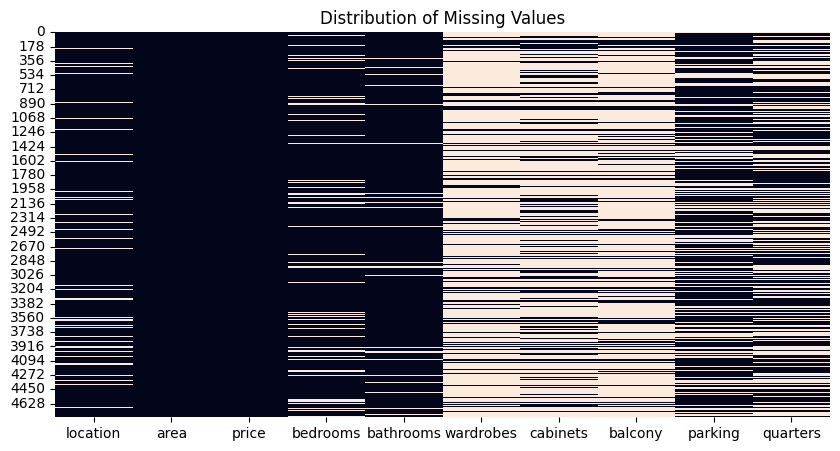

In [43]:
plot_missing_values(houses_dataset)

# PREPROCESSING

In [44]:
houses_dataset['area']
houses_dataset.columns

Index(['location', 'area', 'price', 'bedrooms', 'bathrooms', 'wardrobes',
       'cabinets', 'balcony', 'parking', 'quarters'],
      dtype='object')

In [45]:
houses_dataset['area'].value_counts().head(60)

area
 sqm        1809
25/30 m      730
20/30 m      494
25/20 m      232
30/20 m      158
20/25 m      151
30/30 m      143
30/25 m      134
25/25 m      106
35/30 m       61
28/30 m       59
25/35 m       57
600 sqm       46
20/20 m       44
30/35 m       44
500 sqm       42
30/40 m       34
15/20 m       32
3338 sqm      29
400 sqm       24
750 sqm       17
40/30 m       16
20/15 m       15
1300 sqm      11
35/40 m       11
20/35 m        9
20 sqm         9
700 sqm        8
944 sqm        8
22/25 m        7
35/35 m        7
25 sqm         7
1200 sqm       7
1444 sqm       6
20/16 m        6
22/18 m        5
800 sqm        5
37/000 m       5
17/22 m        5
22/30 m        5
5000 sqm       4
20/40 m        4
3030 sqm       4
35/45 m        4
450 sqm        4
25/23 m        4
22/15 m        4
945 sqm        4
300 sqm        4
999 sqm        4
1310 sqm       4
40/35 m        4
36/28 m        3
40 sqm         3
40/25 m        3
25/15 m        3
30 sqm         3
40/60 m        3
35/20 m  

In [46]:
def clean_area(area):
    """
    Cleans and converts area strings to square meters.
    Args:
    - area (str): The area string to be cleaned and converted.

    Returns:
    - float or None: The area in square meters if successfully cleaned and converted, None otherwise.
    """
    area = area.replace('m', '')
    if '/' in area:
        parts = area.split('/')
        if len(parts) == 2:
            try:
                numerator, denominator = map(int, parts)
                return numerator * denominator
            except ValueError:
                return None
        else:
            return None
    elif area.endswith('sqm'):
        try:
            return float(area[:-3].strip())
        except ValueError:
            return None
    elif area.isdigit():
        return float(area)
    else:
        return None


houses_dataset['clean_area'] = houses_dataset['area'].apply(clean_area)

houses_dataset['clean_area']

0       875.0
1         NaN
2       750.0
3         NaN
4         NaN
        ...  
4794      NaN
4795      NaN
4796      NaN
4797    600.0
4798      NaN
Name: clean_area, Length: 4799, dtype: float64

In [47]:
def clean_price(price, local_currency='Rwf', exchange_rate=1300):
    """
    Cleans and converts prices to integers or USD.

    Args:
    - price (str): The price string to be cleaned and converted.
    - local_currency (str): The suffix indicating the local currency. Default is 'frw'.
    - exchange_rate (float): The exchange rate from local currency to USD. Default is 1300.

    Returns:
    - int or None: The price in local currency as an integer if successfully cleaned and converted,
                   the converted price in USD if already in USD, or None otherwise.
    """
    # Remove any white space from the price string
    price = price.replace(' ', '')

    if price.endswith('$'):
        try:
            usd_price = float(price[:-3].strip())
            return int(usd_price * exchange_rate)
        except ValueError:
            return None
    elif price.endswith(local_currency):
        try:
            local_price = float(price[:-len(local_currency)].strip())
            return float(local_price)
        except ValueError:
            return None
    else:
        try:
            return int(price)
        except ValueError:
            return None


In [48]:
houses_dataset['clean_price'] = houses_dataset['price'].apply(clean_price)
houses_dataset

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes,875.0,55000000.0
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN,NaN,180000000.0
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN,750.0,45000000.0
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500000.0
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,28000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN,NaN,52000000.0
4795,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes,NaN,14000000.0
4796,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,28500000.0
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN,600.0,15000000.0


In [49]:
houses_dataset['price'].value_counts().index

Index(['55 000 000  Rwf', '65 000 000  Rwf', '60 000 000  Rwf',
       '50 000 000  Rwf', '35 000 000  Rwf', '45 000 000  Rwf',
       '70 000 000  Rwf', '75 000 000  Rwf', '85 000 000  Rwf',
       '25 000 000  Rwf',
       ...
       ' 43 520 $', '132 000 000  Rwf', '5 000 000  Rwf', '330 000 000  Rwf',
       '82 000 000  Rwf', '13 500  Rwf', '500 000  Rwf', '211 000 000  Rwf',
       ' 75 000 $', '7 500 000  Rwf'],
      dtype='object', name='price', length=165)

In [50]:
prices = ['13 500  Rwf', '500 000  Rwf', '211 000 000  Rwf',
       ' 75 000 $', '7 500 000  Rwf', 'dfdfdf']

for price in prices:
    cleaned_price = clean_price(price)
    print(f"Original Price: {price}, Cleaned Price: {cleaned_price}")

Original Price: 13 500  Rwf, Cleaned Price: 13500.0
Original Price: 500 000  Rwf, Cleaned Price: 500000.0
Original Price: 211 000 000  Rwf, Cleaned Price: 211000000.0
Original Price:  75 000 $, Cleaned Price: 975000
Original Price: 7 500 000  Rwf, Cleaned Price: 7500000.0
Original Price: dfdfdf, Cleaned Price: None
